## AI Project UCS415 
#### Finding Popularity of Spotify Songs 
Nitansh Jain  102017025

``` Importing Pandas and Numpy ``` 

In [699]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import sklearn

Converting data from the csv file to a dataframe

In [700]:
spotify_df = pd.read_csv('spotify_data.csv')
spotify_df.head()

,title,artist,top genre,year,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,top year,artist_type,pop
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,2022‑02‑17,140,81,61,-6,23,23,203,0,6,2010,Duo,70
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,2022‑02‑17,138,89,68,-4,36,83,192,1,8,2010,Duo,68
2,I Need A Dollar,Aloe Blacc,pop soul,2010,2022‑02‑17,95,48,84,-7,9,96,243,20,3,2010,Solo,72
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,2022‑02‑17,93,87,66,-4,4,38,180,11,12,2010,Solo,80
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,2022‑02‑17,104,85,69,-6,9,74,268,39,5,2010,Solo,79


In [701]:
# checking if any null or nan values are present
print(spotify_df.isna().sum())

title          0
artist         0
top genre      0
year           0
added          0
bpm            0
nrgy           0
dnce           0
dB             0
live           0
val            0
dur            0
acous          0
spch           0
top year       0
artist_type    0
pop            0
dtype: int64


In [702]:
# checking data types of all columns
spotify_df.dtypes

title          object
artist         object
top genre      object
year            int64
added          object
bpm             int64
nrgy            int64
dnce            int64
dB              int64
live            int64
val             int64
dur             int64
acous           int64
spch            int64
top year        int64
artist_type    object
pop             int64
dtype: object

In [703]:
# converting artist type column values to a number [0,1,2]
print(spotify_df['artist_type'].value_counts())
spotify_df['artist_type'] = spotify_df['artist_type'].astype('category').cat.codes
print(spotify_df['artist_type'].value_counts())

Solo          748
Band/Group    169
Duo            70
Trio           13
Name: artist_type, dtype: int64
2    748
0    169
1     70
3     13
Name: artist_type, dtype: int64


In [704]:
# dropping column added and top year from dataframe
# spotify_df.drop(['added', 'top year'], axis=1, inplace=True)
# spotify_df

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,artist_type,pop
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,140,81,61,-6,23,23,203,0,6,1,70
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,138,89,68,-4,36,83,192,1,8,1,68
2,I Need A Dollar,Aloe Blacc,pop soul,2010,95,48,84,-7,9,96,243,20,3,2,72
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,93,87,66,-4,4,38,180,11,12,2,80
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,104,85,69,-6,9,74,268,39,5,2,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,SICKO MODE,Travis Scott,hip hop,2018,155,73,83,-4,12,45,313,1,22,2,86
996,EARFQUAKE,"Tyler, The Creator",hip hop,2019,80,50,55,-9,80,41,190,23,7,2,85
997,Boasty (feat. Idris Elba),Wiley,grime,2019,103,77,89,-5,9,46,177,1,7,2,68
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,2019,138,58,53,-6,10,59,214,1,10,1,67


In [705]:
# converting name of column top genre to genre
spotify_df = spotify_df.rename(columns={'top genre': 'genre', 'pop': 'popularity'})
spotify_df.head()

,title,artist,genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,artist_type,popularity
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,140,81,61,-6,23,23,203,0,6,1,70
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,138,89,68,-4,36,83,192,1,8,1,68
2,I Need A Dollar,Aloe Blacc,pop soul,2010,95,48,84,-7,9,96,243,20,3,2,72
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,93,87,66,-4,4,38,180,11,12,2,80
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,104,85,69,-6,9,74,268,39,5,2,79


In [706]:
spotify_df['genre'].value_counts()

dance pop           361
pop                  57
atl hip hop          39
art pop              37
hip hop              21
                   ... 
french shoegaze       1
new french touch      1
hip pop               1
australian psych      1
uk drill              1
Name: genre, Length: 132, dtype: int64

In [707]:
# getting columns from spotify_df from bpm to artist_type via loc
spotify_features = spotify_df.loc[:,'bpm':'popularity']
spotify_features

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,artist_type,popularity
0,140,81,61,-6,23,23,203,0,6,1,70
1,138,89,68,-4,36,83,192,1,8,1,68
2,95,48,84,-7,9,96,243,20,3,2,72
3,93,87,66,-4,4,38,180,11,12,2,80
4,104,85,69,-6,9,74,268,39,5,2,79
...,...,...,...,...,...,...,...,...,...,...,...
995,155,73,83,-4,12,45,313,1,22,2,86
996,80,50,55,-9,80,41,190,23,7,2,85
997,103,77,89,-5,9,46,177,1,7,2,68
998,138,58,53,-6,10,59,214,1,10,1,67


In [708]:
# splitting dataframe into dependent and independent variables
spotify_features_x = spotify_features.drop(['artist_type','popularity'], axis=1)
spotify_features_y = spotify_features['popularity']

print(spotify_features_x.shape)
print(spotify_features_y.shape)

(1000, 9)
(1000,)


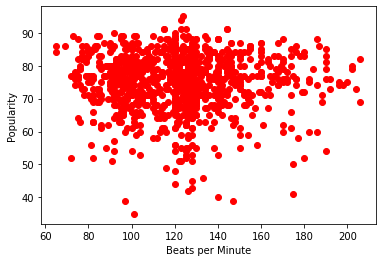

In [709]:
# checking relation of bpm with the popularity
plt.scatter(spotify_features.bpm, spotify_features.popularity, color='red')
plt.xlabel('Beats per Minute')
plt.ylabel('Popularity')
plt.show()



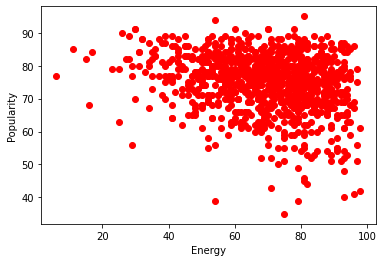

In [710]:
# checking relation of energy with the popularity
plt.scatter(spotify_features.nrgy, spotify_features.popularity, color='red')
plt.xlabel('Energy')
plt.ylabel('Popularity')
plt.show()


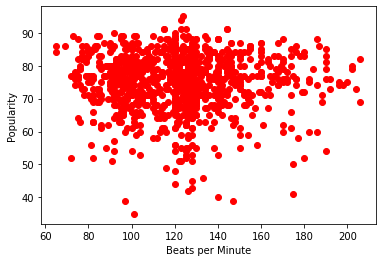

In [711]:
# checking relation of bpm with the popularity
plt.scatter(spotify_features.bpm, spotify_features.popularity, color='red')
plt.xlabel('Beats per Minute')
plt.ylabel('Popularity')
plt.show()


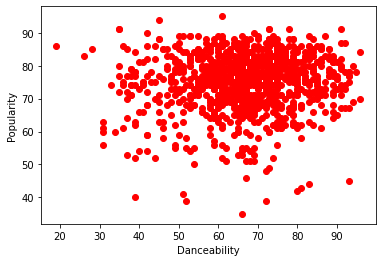

In [712]:
# checking relation of danceability with the popularity
plt.scatter(spotify_features.dnce, spotify_features.popularity, color='red')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.show()

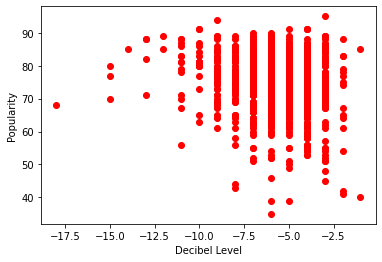

In [713]:
# converting negative decibel value to positive
# spotify_features['dB'] = np.abs(spotify_features['dB'])
# checking relation of decibels with the popularity
plt.scatter(spotify_features.dB, spotify_features.popularity, color='red')
plt.xlabel('Decibel Level')
plt.ylabel('Popularity')
plt.show()

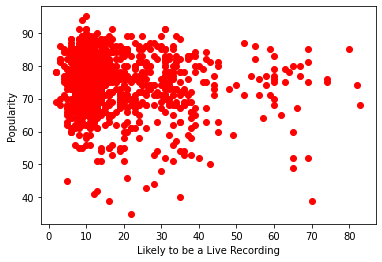

In [714]:
# checking relation of live with the popularity
plt.scatter(spotify_features.live, spotify_features.popularity, color='red')
plt.xlabel('Likely to be a Live Recording')
plt.ylabel('Popularity')
plt.show()

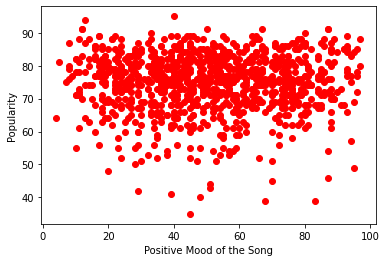

In [715]:
# checking relation of val with the popularity
plt.scatter(spotify_features.val, spotify_features.popularity, color='red')
plt.xlabel('Positive Mood of the Song')
plt.ylabel('Popularity')
plt.show()

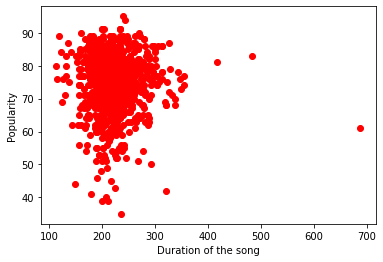

In [716]:
# checking relation of Duration with the popularity
plt.scatter(spotify_features.dur, spotify_features.popularity, color='red')
plt.xlabel('Duration of the song')
plt.ylabel('Popularity')
plt.show()

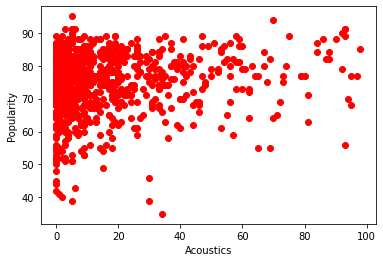

In [717]:
# checking relation of Acoustics with the popularity
plt.scatter(spotify_features.acous, spotify_features.popularity, color='red')
plt.xlabel('Acoustics')
plt.ylabel('Popularity')
plt.show()

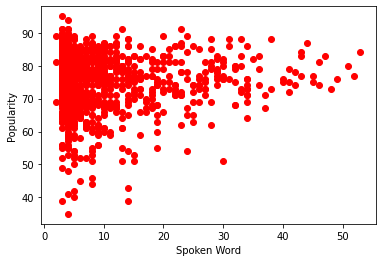

In [718]:
# checking relation of Duration with the popularity
plt.scatter(spotify_features.spch, spotify_features.popularity, color='red')
plt.xlabel('Spoken Word')
plt.ylabel('Popularity')
plt.show()

[Text(0, 0, 'Band/Group'),
 Text(1, 0, 'Duo'),
 Text(2, 0, 'Solo'),
 Text(3, 0, 'Trio')]

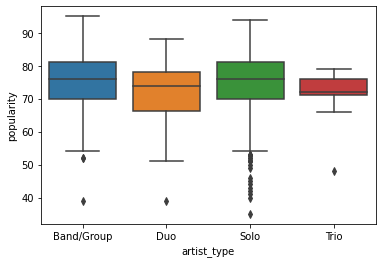

In [719]:
# # creating boxplot based on artist_type
ax = sns.boxplot(x='artist_type', y='popularity', data=spotify_df)
ax.set_xticklabels(['Band/Group','Duo', 'Solo', 'Trio'])


In [720]:
# checking correlation table
spotify_features.head()
spotify_features.corr(method='pearson')

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,artist_type,popularity
bpm,1.000000,0.118557,-0.111660,0.089568,0.014672,0.021128,-0.016536,-0.124614,0.149368,0.003363,-0.025058
nrgy,0.118557,1.000000,-0.129279,0.713428,0.184094,0.372866,-0.049662,-0.504083,-0.099790,-0.127276,-0.234011
dnce,-0.111660,-0.129279,1.000000,-0.040538,-0.113324,0.264781,-0.168483,-0.075999,0.161734,0.192161,0.093176
dB,0.089568,0.713428,-0.040538,1.000000,0.128134,0.317128,-0.082541,-0.392393,-0.165838,-0.030464,-0.145403
live,0.014672,0.184094,-0.113324,0.128134,1.000000,0.028092,-0.003094,-0.116081,0.043516,-0.017186,-0.137305
val,0.021128,0.372866,0.264781,0.317128,0.028092,1.000000,-0.185863,-0.164048,0.013192,-0.080910,-0.003752
dur,-0.016536,-0.049662,-0.168483,-0.082541,-0.003094,-0.185863,1.000000,0.026474,-0.035451,-0.044714,0.009219
acous,-0.124614,-0.504083,-0.075999,-0.392393,-0.116081,-0.164048,0.026474,1.000000,-0.010204,0.057935,0.128195
spch,0.149368,-0.099790,0.161734,-0.165838,0.043516,0.013192,-0.035451,-0.010204,1.000000,0.189485,0.061441
artist_type,0.003363,-0.127276,0.192161,-0.030464,-0.017186,-0.080910,-0.044714,0.057935,0.189485,1.000000,-0.007490


In [721]:
print(spotify_features_x.head())
spotify_features_x_np = np.asarray(spotify_features[['bpm', 'dnce', 'nrgy', 'dB', 'live', 'val', 'acous', 'spch']])
spotify_features_x_np[0:5]

print(spotify_features_y.head())
spotify_features_y_np = np.asarray(spotify_features['popularity'])
spotify_features_y_np[0:5]

   bpm  nrgy  dnce  dB  live  val  dur  acous  spch
0  140    81    61  -6    23   23  203      0     6
1  138    89    68  -4    36   83  192      1     8
2   95    48    84  -7     9   96  243     20     3
3   93    87    66  -4     4   38  180     11    12
4  104    85    69  -6     9   74  268     39     5
0    70
1    68
2    72
3    80
4    79
Name: popularity, dtype: int64


array([70, 68, 72, 80, 79])

In [722]:
from sklearn import preprocessing
spotify_features_X = preprocessing.MinMaxScaler().fit_transform(spotify_features_x_np)
spotify_features_Y = preprocessing.MinMaxScaler().fit_transform(spotify_features_y_np.reshape(-1, 1))


In [723]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(spotify_features_X, spotify_features_Y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)
print(x_train[0:5])

(800, 8) (200, 8)
(800, 1) (200, 1)
[[0.18439716 0.67532468 0.75       0.70588235 0.18518519 0.17204301
  0.17346939 0.09803922]
 [0.09929078 0.2987013  0.7173913  0.82352941 0.11111111 0.60215054
  0.21428571 0.15686275]
 [0.26241135 0.62337662 0.68478261 0.64705882 0.07407407 0.17204301
  0.31632653 0.17647059]
 [0.24822695 0.5974026  0.82608696 0.76470588 0.12345679 0.38709677
  0.06122449 0.11764706]
 [0.44680851 0.71428571 0.38043478 0.58823529 0.18518519 0.35483871
  0.81632653 0.15686275]]


Using Multi Linear Regression

In [724]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr

LinearRegression()

In [725]:
lr.fit(x_train, y_train)
print(lr.intercept_)
print(lr.coef_)

[0.73373669]
[[ 0.00301699  0.03557822 -0.22515371  0.06863781 -0.07499739  0.04527591
   0.01457456  0.03067535]]


In [726]:
yhat_spotify_pop_lr = lr.predict(x_test)
print(y_test[0:5])
yhat_spotify_pop_lr[0:5]

[[0.8       ]
 [0.86666667]
 [0.83333333]
 [0.68333333]
 [0.71666667]]


array([[0.65647735],
       [0.62332408],
       [0.70999827],
       [0.60549389],
       [0.72586189]])

In [727]:
print('Residual sum of squares: %.2f' % np.mean((y_test - yhat_spotify_pop_lr) ** 2))
print('Root Mean Square Error: %.2f' % np.sqrt(np.mean((y_test - yhat_spotify_pop_lr) ** 2)))
print('R2 score: %.2f' % r2_score(y_test, yhat_spotify_pop_lr))


Residual sum of squares: 0.02
Root Mean Square Error: 0.14
R2 score: 0.07


Using Polynomial Regression

In [728]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
poly = PolynomialFeatures(degree=2)
train_spotify_pop_poly = poly.fit_transform(x_train)


In [729]:
clf = linear_model.LinearRegression()
clf.fit(train_spotify_pop_poly, y_train)
print(clf.intercept_)
print(clf.coef_)

[0.85921841]
[[-3.25268633e-16  4.87127442e-02  3.69705846e-01  4.38078775e-01
  -5.19454220e-01 -2.83022786e-01 -5.42290816e-01 -3.81793099e-01
  -2.14624791e-01  1.40204045e-02 -8.53342192e-02 -1.66351844e-01
  -9.45315939e-02  1.76401540e-01  2.50016385e-01 -2.66231569e-02
   9.36626885e-02 -4.49435292e-01 -3.33098577e-01  4.73999001e-01
   1.34328596e-01  1.48028435e-01 -4.04578317e-02  1.65116670e-01
  -3.43887290e-01 -2.71021094e-01  4.77917825e-02  4.91232626e-01
  -1.75820612e-01  1.71082560e-01  2.40992224e-01 -1.68691313e-01
   2.56064192e-01  4.38921274e-01 -8.36146196e-02  2.04327541e-01
  -1.85882732e-01  4.29057283e-01  4.09041957e-01 -7.47880629e-02
   2.21977747e-02 -2.06073046e-01  1.91009033e-01  2.52408190e-01
   7.93882967e-02]]


In [730]:
from sklearn.metrics import r2_score
x_test_poly = poly.fit_transform(x_test)
yhat_test_spotify_pop_poly_lr = clf.predict(x_test_poly)
# print(yhat_test_spotify_pop_poly_lr)
print('Mean Square Error: %.2f' % np.mean((y_test - yhat_test_spotify_pop_poly_lr) ** 2))
print('Root Mean Square Error: %.2f' % np.sqrt(np.mean((y_test - yhat_test_spotify_pop_poly_lr) ** 2)))
print('R2 score: %.2f' % r2_score(y_test, yhat_test_spotify_pop_poly_lr))

Mean Square Error: 0.02
Root Mean Square Error: 0.14
R2 score: 0.06
